# Customer Churn Analysis

**Dataset info** : Sample dataset containing customer data and showing customers left last month

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/telco_churn.csv')

In [145]:
df.shape # gives idea about the size of the dataset

(7043, 21)

In [146]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [147]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [148]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior citizen is actually a categorical data hence the 25-50-75% distribution is not proper

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.01, 'Count of TARGET Variable per category')

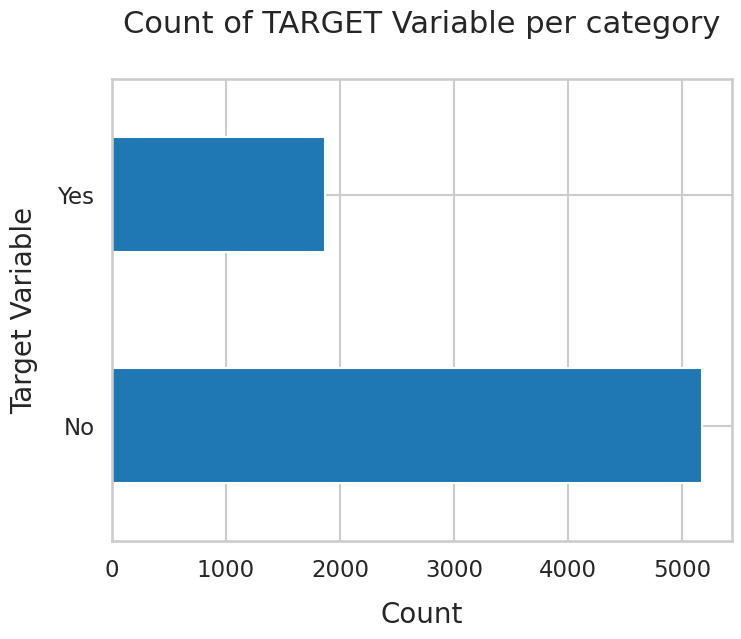

In [149]:
df["Churn"].value_counts().plot(kind='barh' ,figsize=(8, 6))
plt.xlabel("Count",labelpad = 14)
plt.ylabel("Target Variable", labelpad= 14)
plt.title("Count of TARGET Variable per category", y=1.01)

- Data is highly imbalanced, ratio = 73:27
- So we analyse the data with other features while taking the target values separately to get some insights.

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


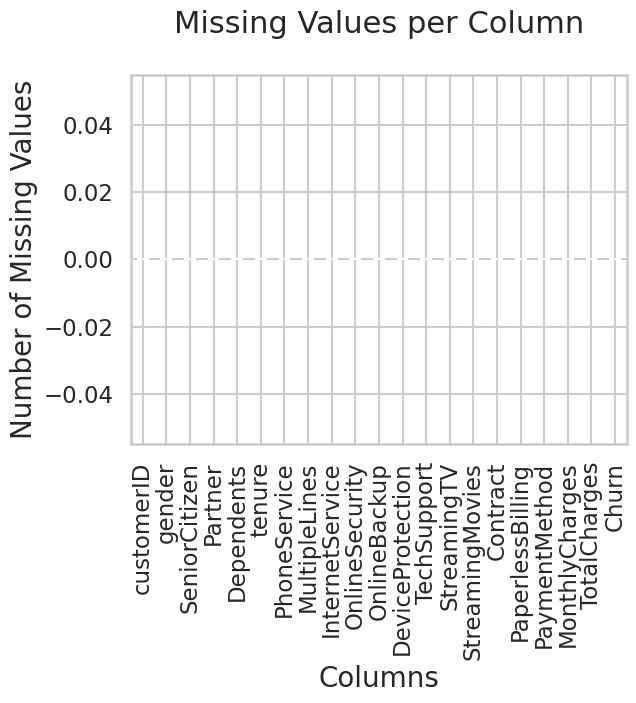

In [151]:
missing_values = df.isnull().sum()

# Plot a bar chart
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

### Missing Data

- Here we don't have any missing data

General Thumb Rules:
 - For features with less missing values - use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
 - For features with very high number of missing values - it is better to drop those columns as they giver very less insight on analysis


## Data Cleaning

1. Creating a copy of base data for manipulation and processing

In [152]:
new_df = df.copy()
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Total charges should be numeric type

In [153]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [154]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3. We can see that there are 11 null values in total charges
4. Missing value Treatment - Since % of these records is low compared to total dataset, we can drop them

In [155]:
new_df.dropna(how='any', inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

5. **Data Binning** - Divide the customers into various groups based on tenure

In [156]:
# Get the tenure max value
new_df['tenure'].max()

72

In [157]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1, 72, 12)]
new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80 , 12), right=False, labels=labels)

In [158]:
new_df.tenure_group.value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


6. Remove the columns which are not required for processing

In [159]:
new_df.drop(columns = ['customerID', 'tenure'], axis=1, inplace=True)

In [160]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

1. Plot distribution of individual predictors by churn

##### **Univariate Analysis**

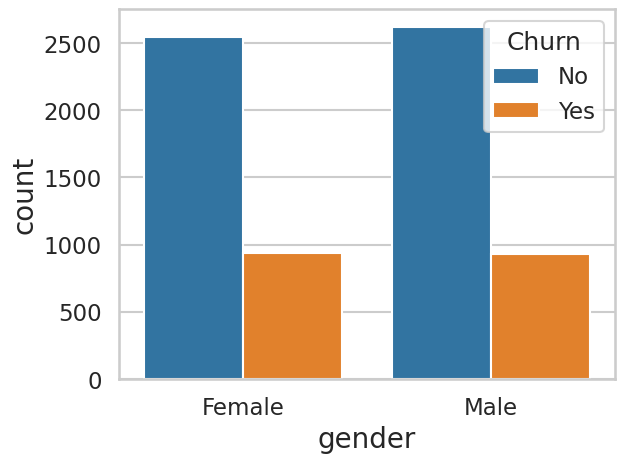

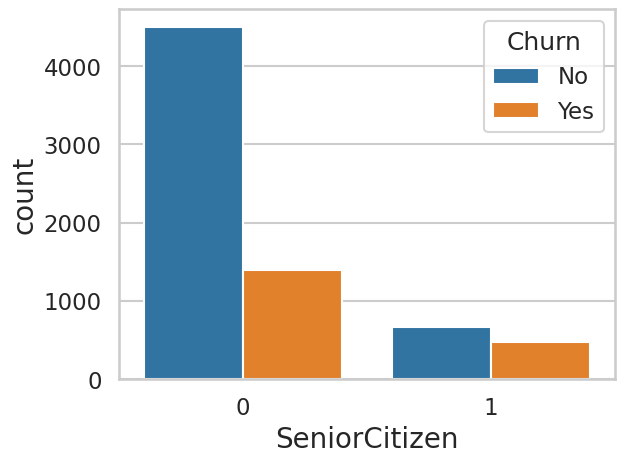

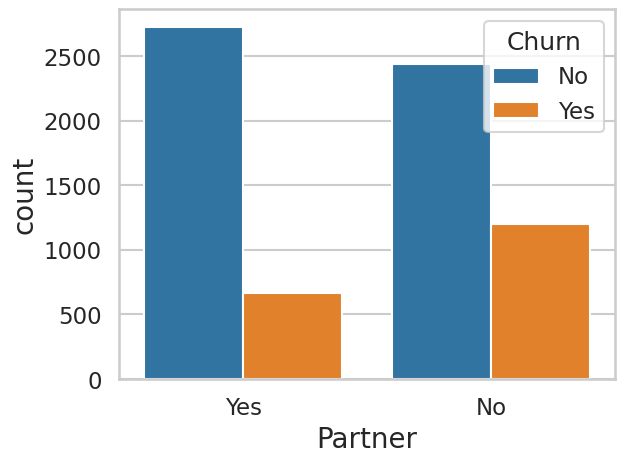

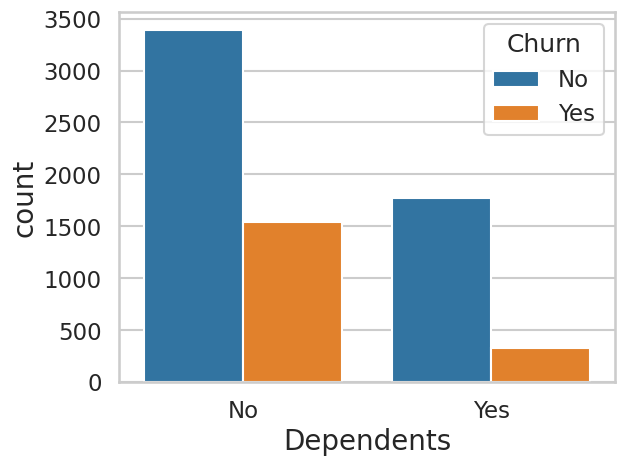

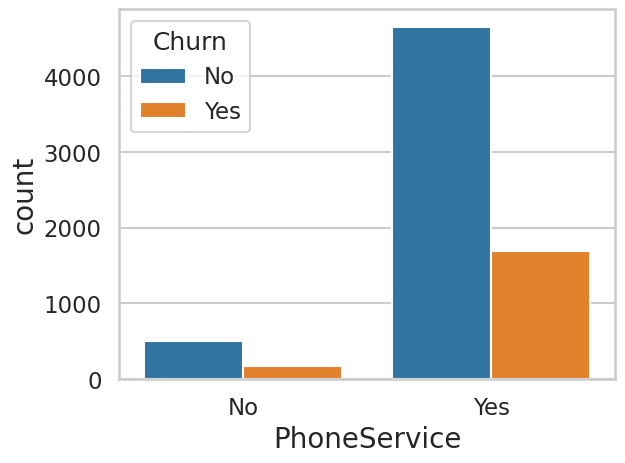

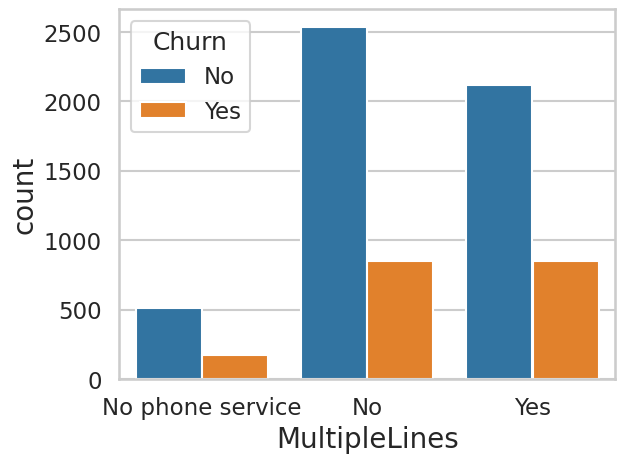

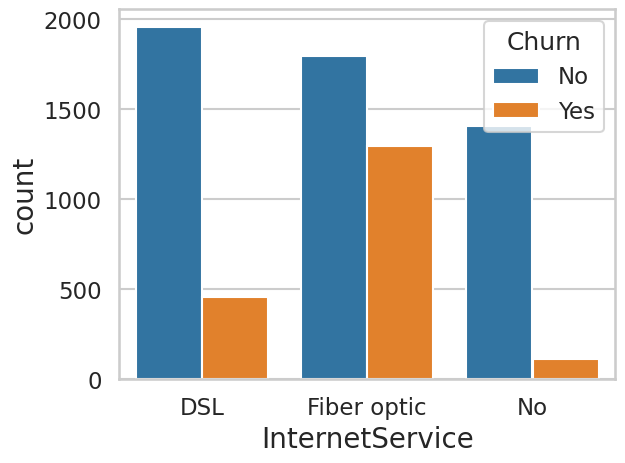

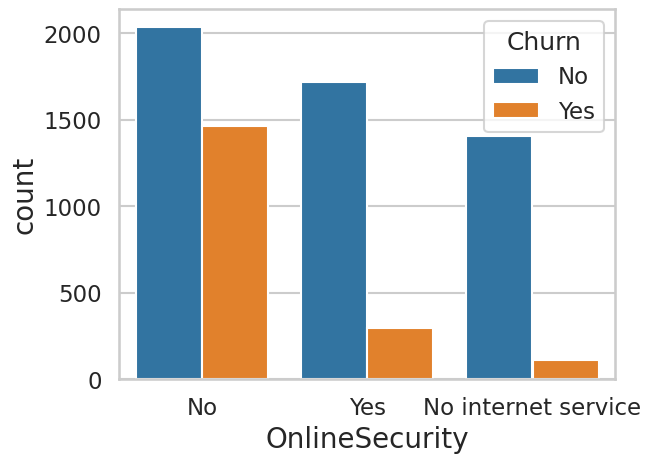

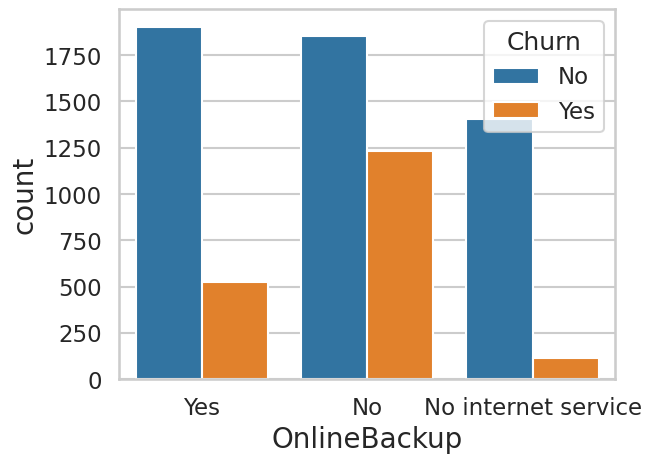

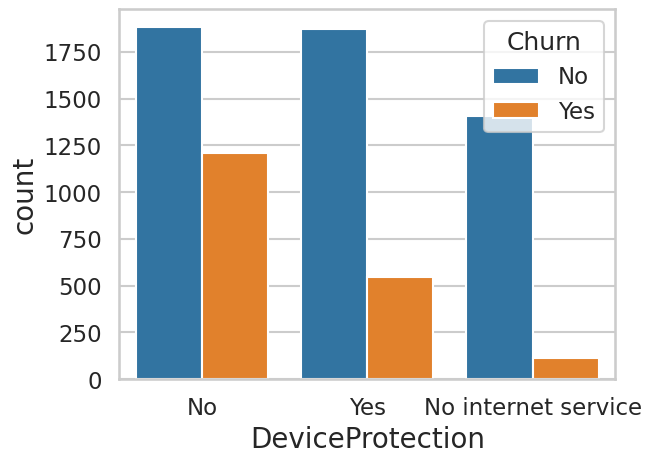

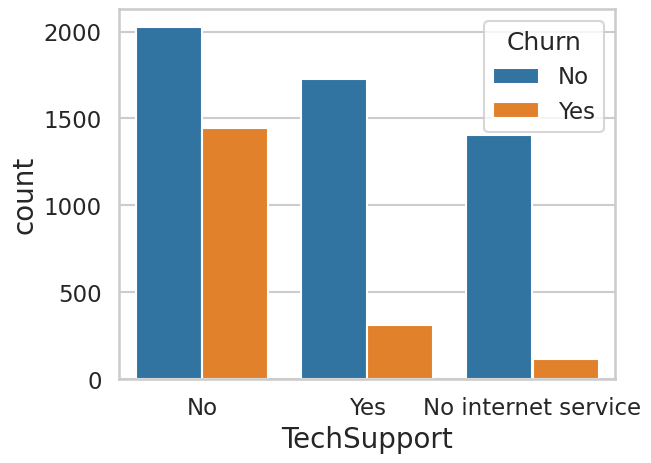

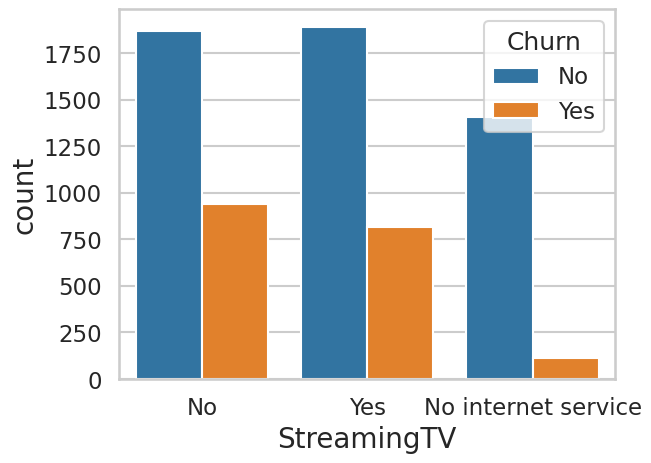

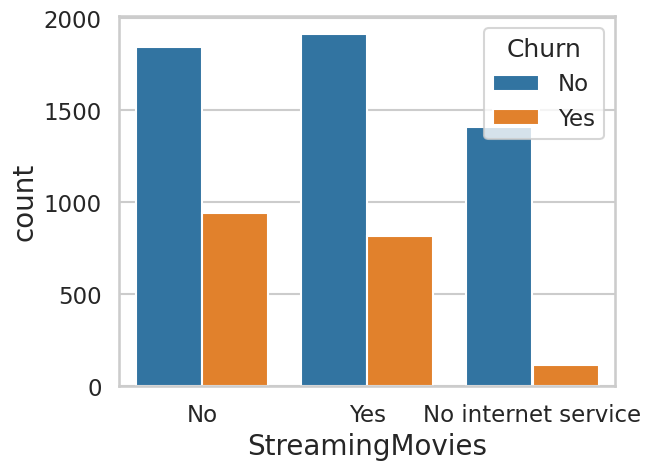

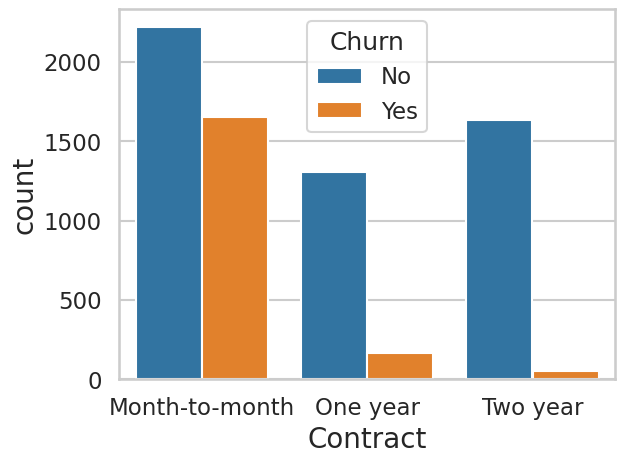

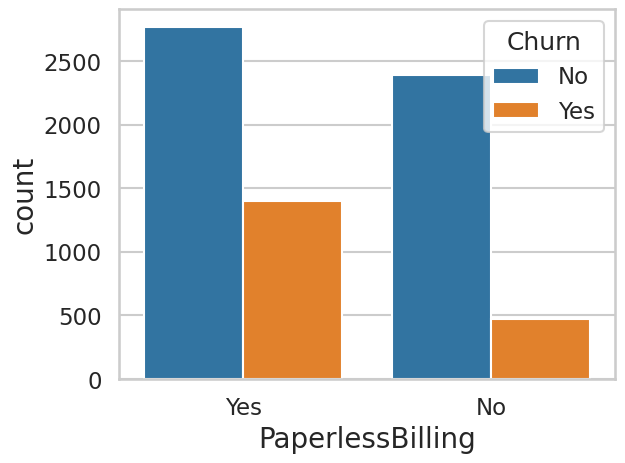

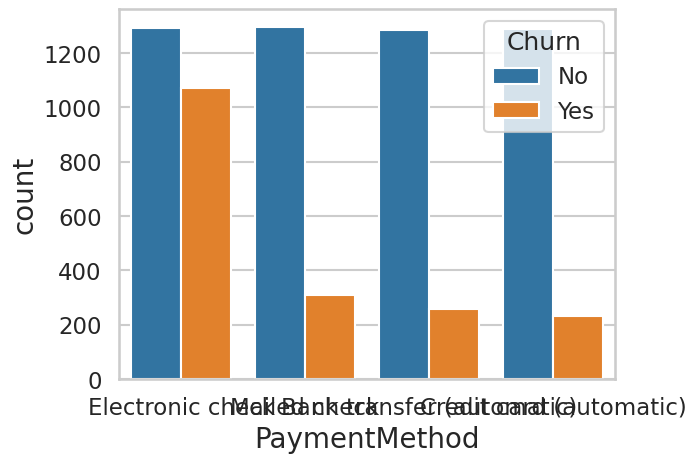

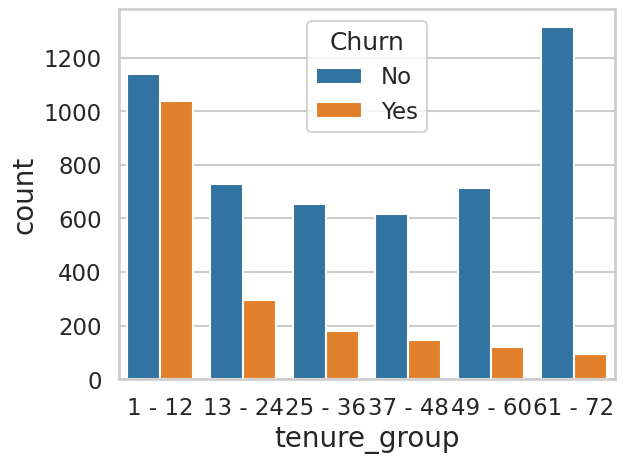

In [161]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data= new_df, x=predictor, hue='Churn')

In [162]:
new_df.Churn.value_counts()/len(df)*100

,count
Churn,
No,73.306829
Yes,26.536987


**Insights**

- Senior citizens are more likely to churn
- People with no partners are more likely to churn
- Monthly contracts are more likely to churn because they are free customers
- People who pay via electronic check are more likely to churn

### Numerical Analysis

In [163]:
new_df.gender.value_counts()

,count
gender,
Male,3549
Female,3483


In [164]:
new_df1_target0 = new_df[new_df["Churn"]=='No']
new_df1_target1 = new_df[new_df["Churn"]=='Yes']

In [165]:
new_df1_target1.gender.value_counts()

,count
gender,
Female,939
Male,930


In [166]:
pd.crosstab(new_df.PaymentMethod,new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


Converting the target variable 'Churn' into numerical variable

In [167]:
new_df['Churn'] = np.where(new_df.Churn == 'Yes', 1, 0)
new_df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


Converting all categorical variables in dummy variables - **Dummy Encoding**

In [168]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Relationship between Monthly Charges and Total Charges

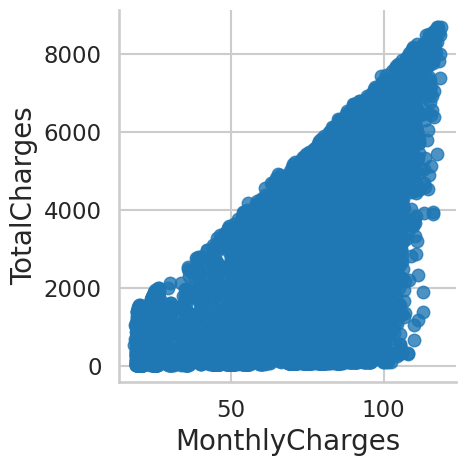

In [169]:
sns.lmplot(data=new_df_dummies, x="MonthlyCharges", y="TotalCharges", fit_reg=False)

In [170]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262027

Monthly Charges and Total Charges are positively correlated with a correlation coefficient of 0.65

Text(0.5, 1.0, 'Monthly Charges by Churn')

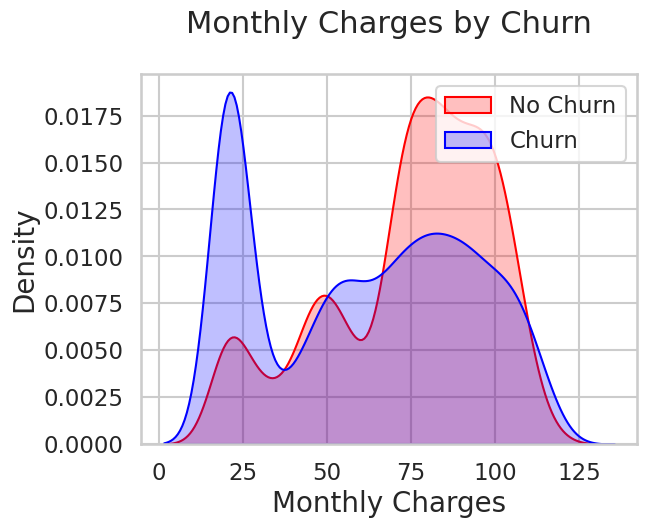

In [171]:
# Kernel Density Plot
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)], color='red', fill=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)], ax=Mth, color='blue', fill=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Monthly Charges by Churn")

Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total Charges by Churn')

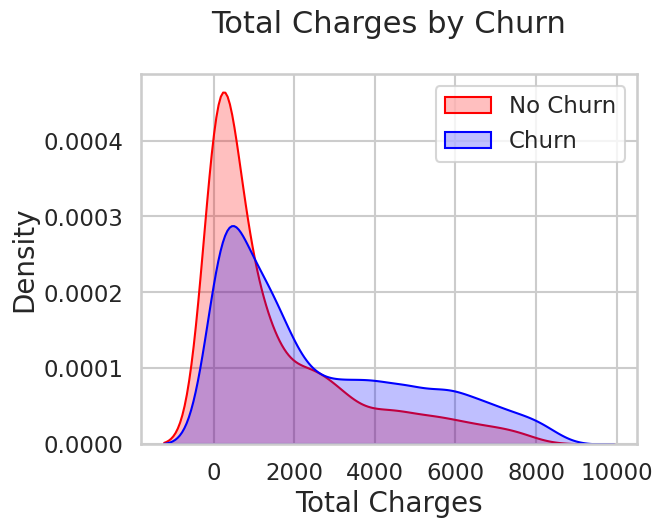

In [172]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==1)], color='red', fill=True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']==0)], ax=Tot, color='blue', fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel("Density")
Tot.set_xlabel("Total Charges")
Tot.set_title("Total Charges by Churn")

Text(0.5, 1.0, 'Tenure by Churn')

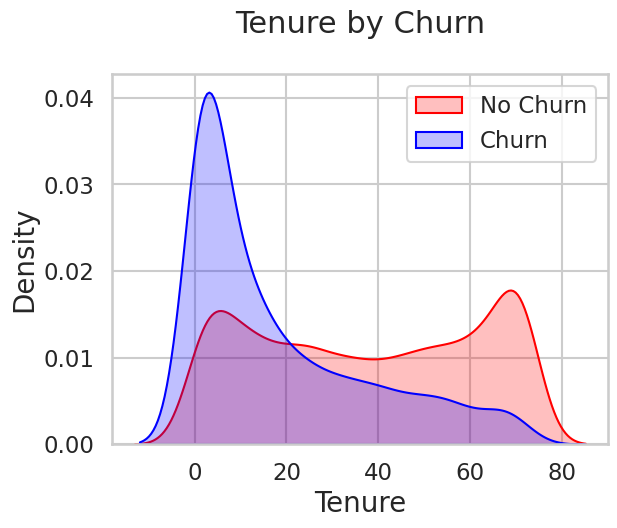

In [173]:
Ten = sns.kdeplot(df.tenure[(df['Churn']=='No')], color='red', fill=True)
Ten = sns.kdeplot(df.tenure[(df['Churn']=='Yes')], ax=Ten, color='blue', fill=True)
Ten.legend(["No Churn", "Churn"], loc='upper right')
Ten.set_ylabel("Density")
Ten.set_xlabel("Tenure")
Ten.set_title("Tenure by Churn")

- Another very good insight from the tenure graph we can see that people who are having less tenure period are **HIGH CHURNERS** as compared to people having more tenure period.

> **Surprising Insight** We can see that there is higher churn rate at lower total charges
> However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges and Total Charges then the picture is bit clear - Higher Monthly charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz. Higher Monthly Charge, Lower Total Charge are linked to High Churn



Correlation between the different datas

<Axes: >

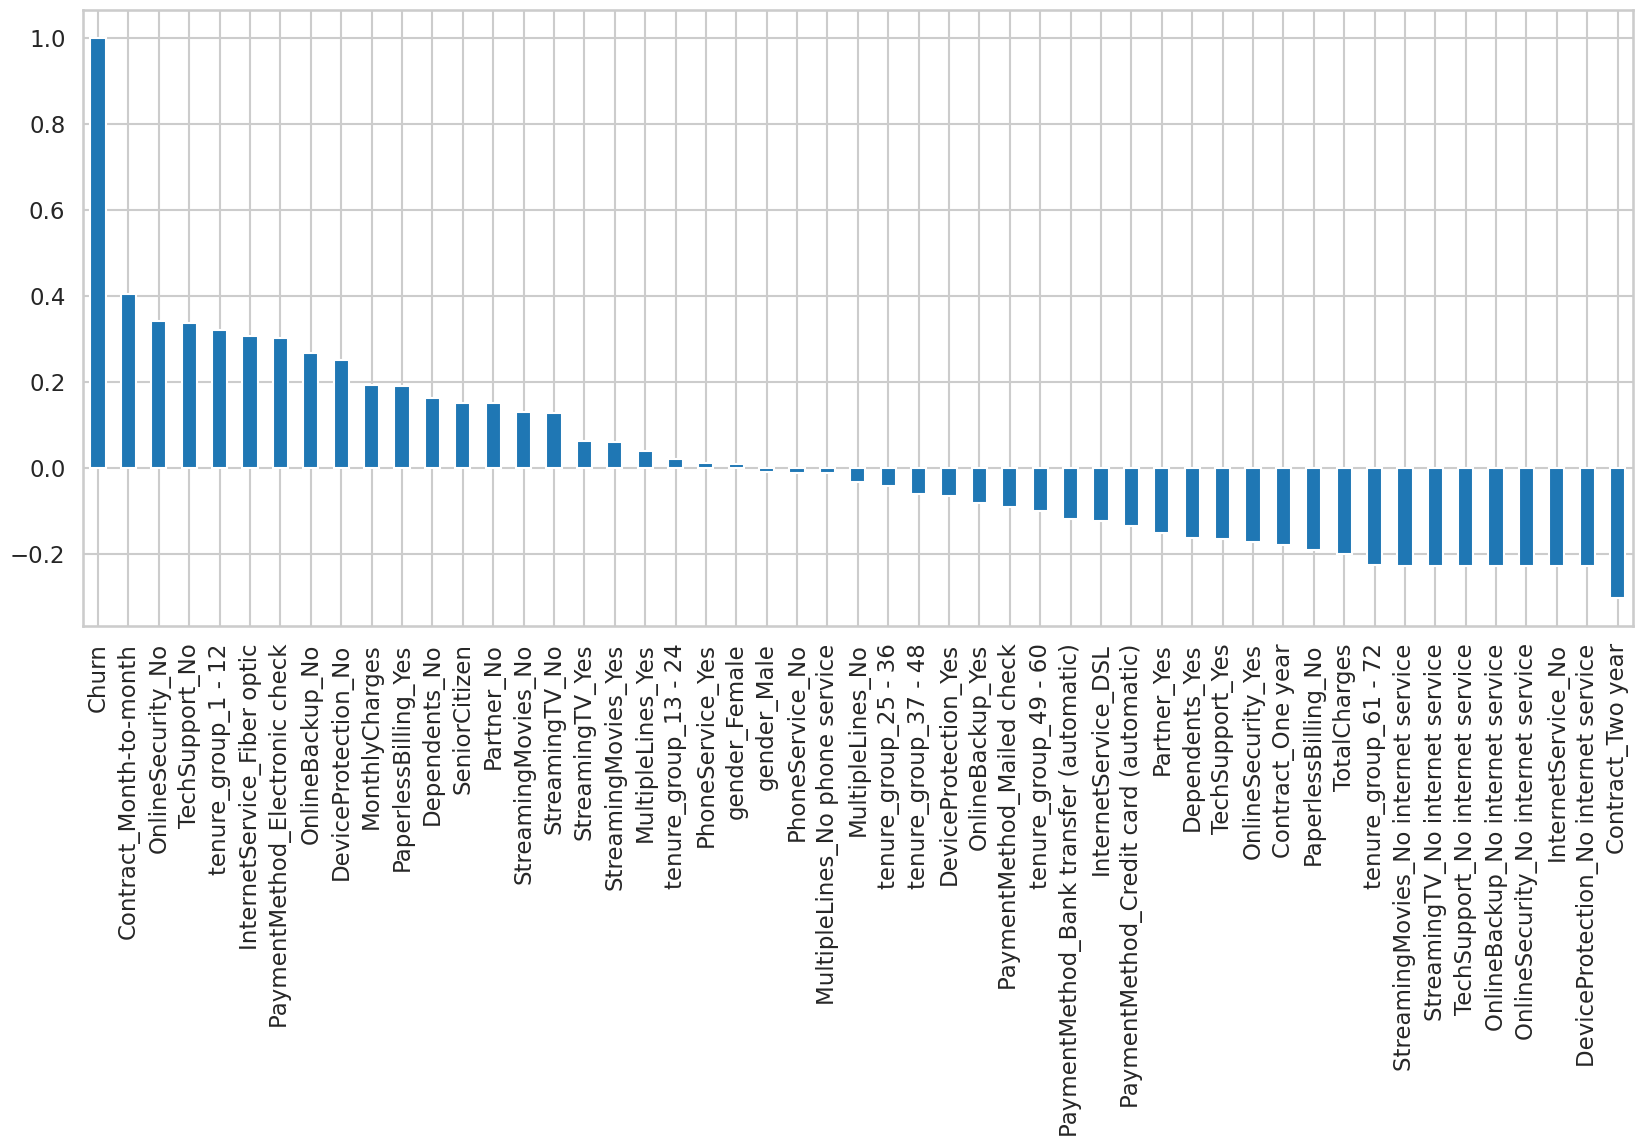

In [174]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

**Derived Insights**
***
1. **High** Churn is seen in case of Month to Month Contracts, no online security, no tech support, first year of subscription and Fibre Optics Internet

2. **Low** Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

3. Factors like Gender, Avalibility of Phone service and number of multiple lines have almost NO impact on Churn.


<Axes: >

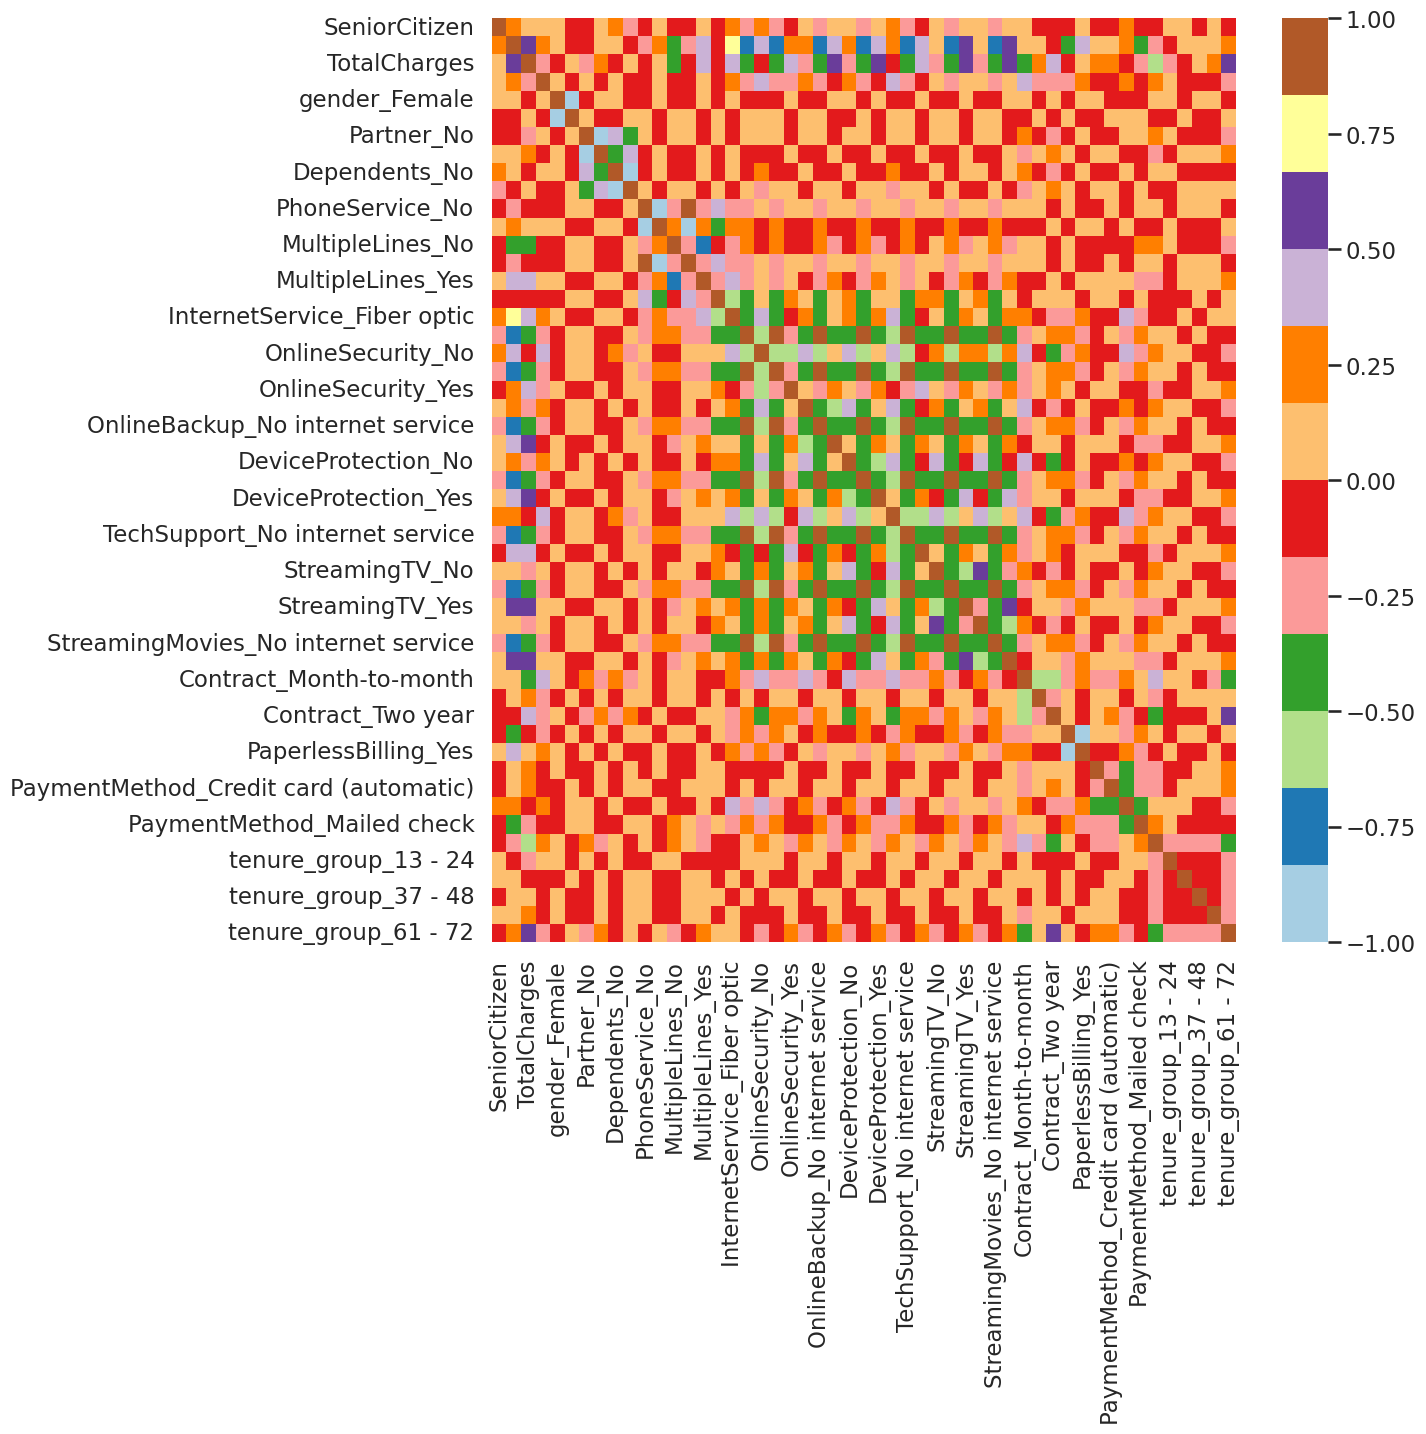

In [175]:
# Heat Map
plt.figure(figsize=(12, 12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [176]:
# Not Churned Customers
new_df1_target0 = new_df.loc[new_df["Churn"]==0]
# Churned Customers
new_df1_target1 = new_df.loc[new_df["Churn"]==1]

In [177]:
new_df1_target0

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,13 - 24
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,61 - 72
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12


In [178]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    # width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    # fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    # plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col ,hue = hue)

    plt.show()

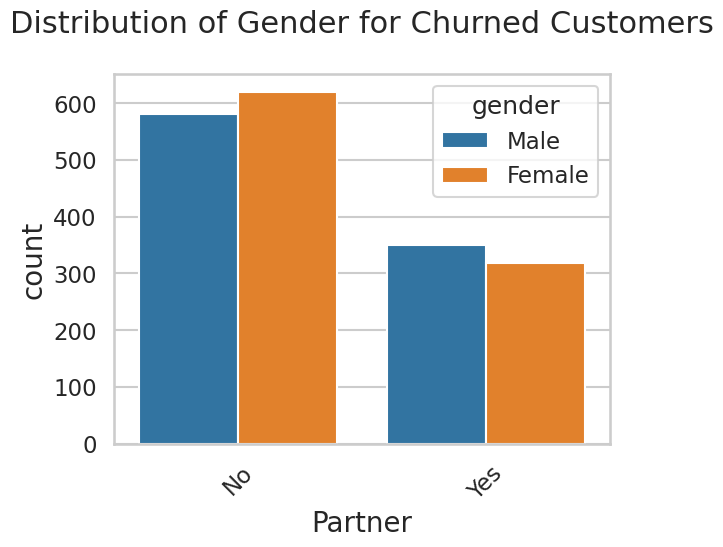

In [179]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

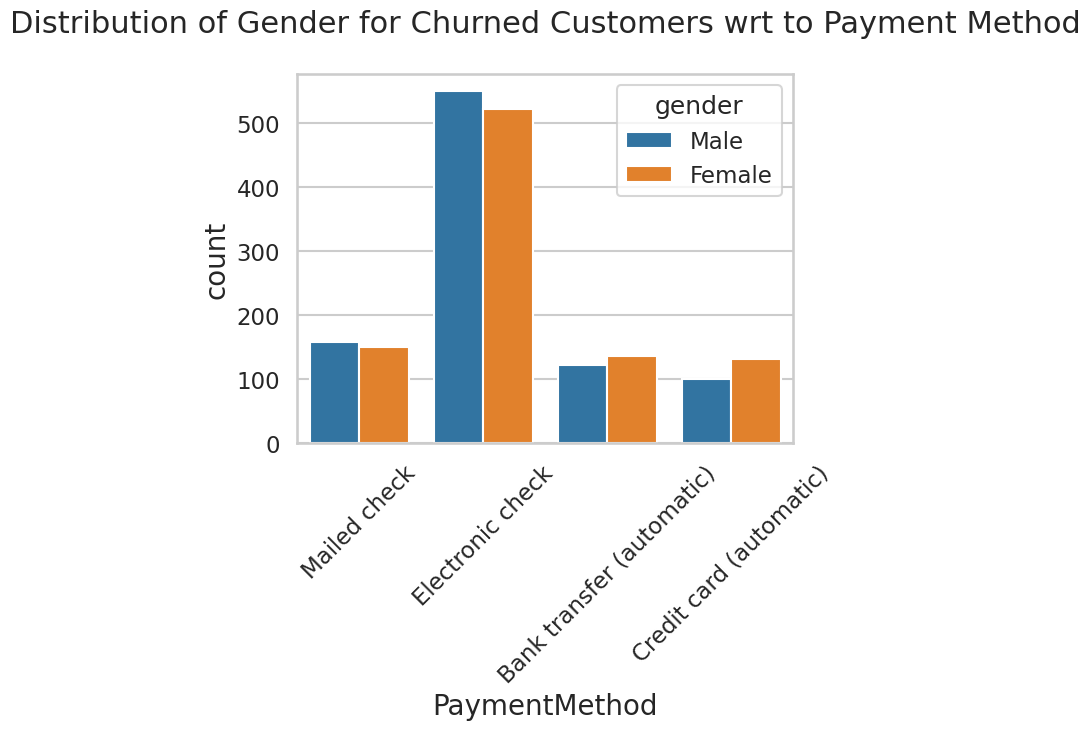

In [180]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Gender for Churned Customers wrt to Payment Method',hue='gender')

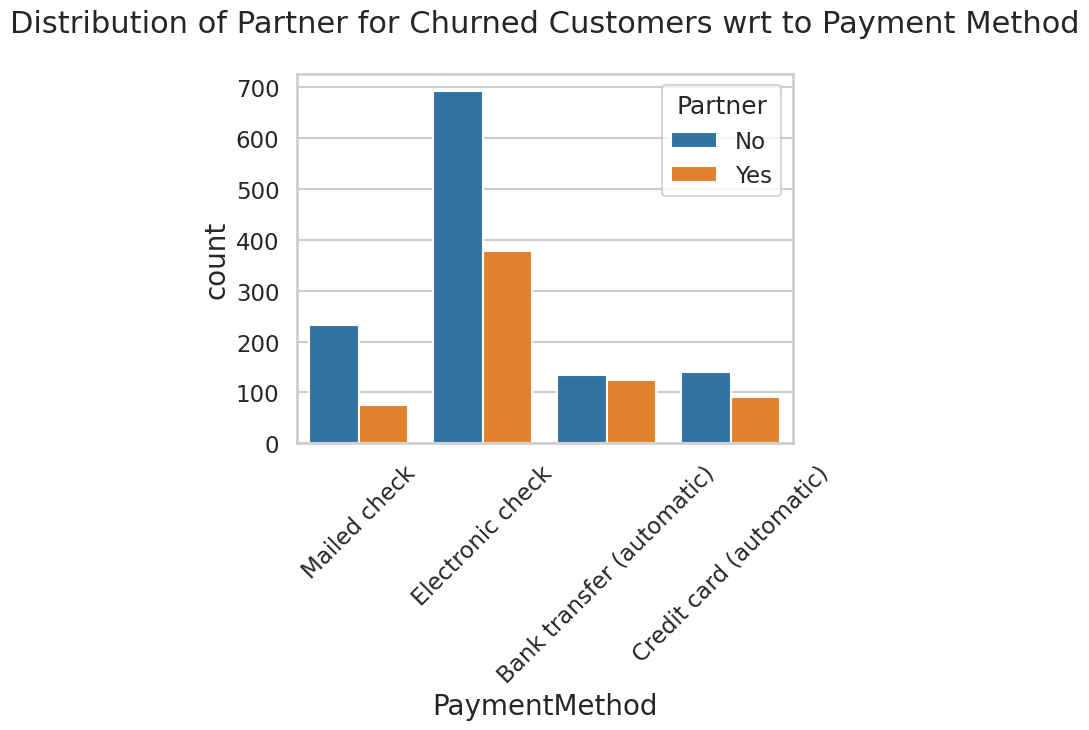

In [181]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of Partner for Churned Customers wrt to Payment Method',hue='Partner')

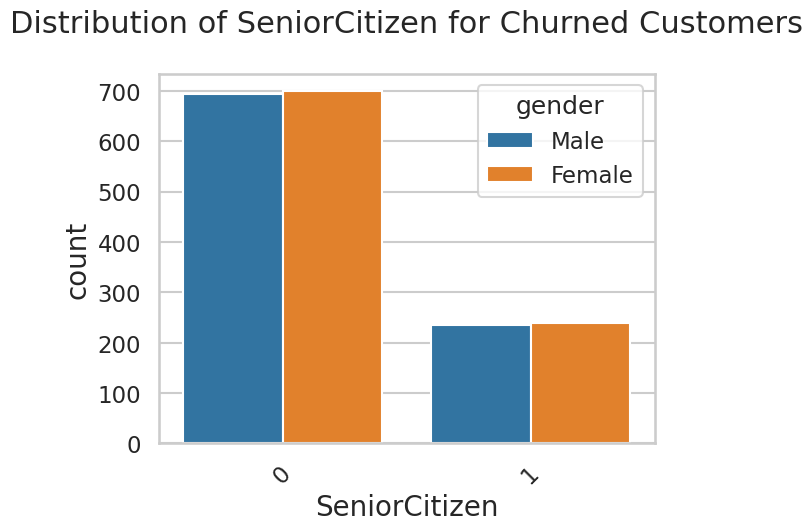

In [182]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

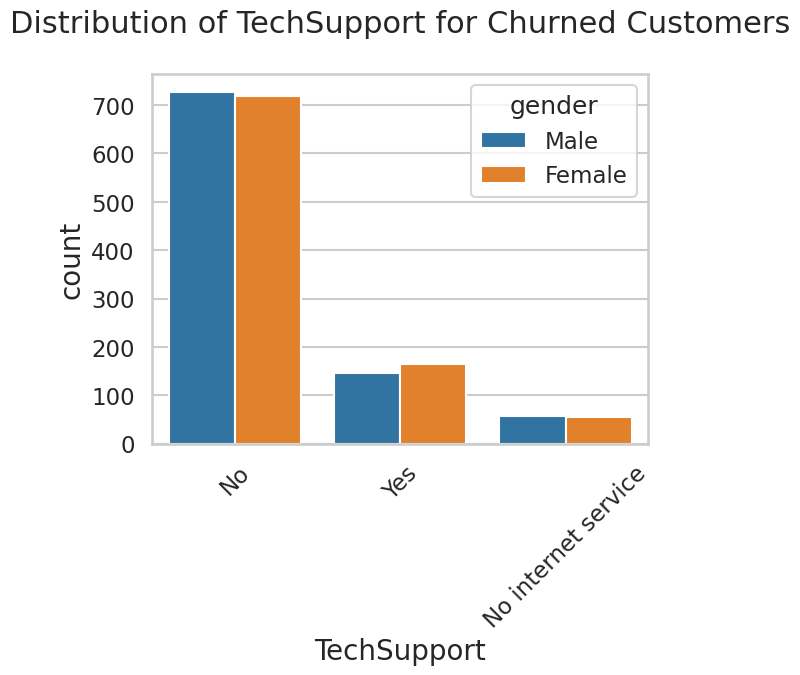

In [183]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

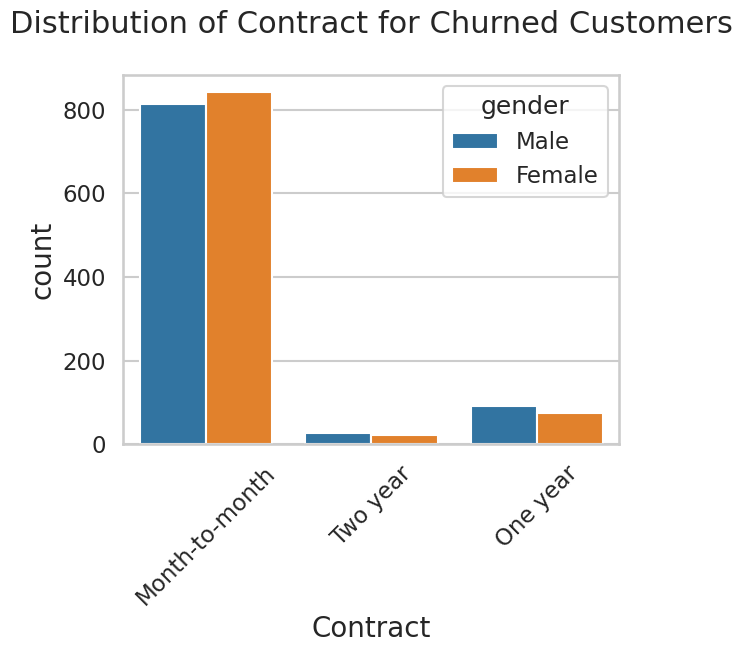

In [184]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

##  Conclusion
***
1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners